In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


# Binning
mengubah data numerik menjadi kategorik dalam interval tertentu. Dikenal juga dengan nama *categorization* atau *discretazion*.  
Mari kita coba melakukan binning pada kolom total_bill di data tips.

In [2]:
tips= sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


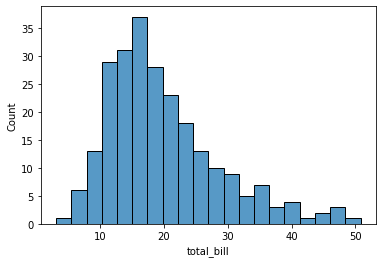

In [5]:
sns.histplot(tips['total_bill'], bins=20)

## With Pandas

In [7]:
tips['total_bill eq freq']=pd.qcut(tips['total_bill'],5) # output berupa range/interval
# qcut untuk eq frequency
tips.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill eq freq
0,16.99,1.01,Female,No,Sun,Dinner,2,"(16.222, 19.818]"
1,10.34,1.66,Male,No,Sun,Dinner,3,"(3.069, 12.636]"
2,21.01,3.50,Male,No,Sun,Dinner,3,"(19.818, 26.098]"
3,23.68,3.31,Male,No,Sun,Dinner,2,"(19.818, 26.098]"
4,24.59,3.61,Female,No,Sun,Dinner,4,"(19.818, 26.098]"


In [10]:
tips['total_bill eqfreq encode']= pd.qcut(tips['total_bill'],5, labels= range(1,6)) #output sudah berupa encoding ordinal
tips.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill eq freq,total_bill eqfreq encode
0,16.99,1.01,Female,No,Sun,Dinner,2,"(16.222, 19.818]",3
1,10.34,1.66,Male,No,Sun,Dinner,3,"(3.069, 12.636]",1
2,21.01,3.50,Male,No,Sun,Dinner,3,"(19.818, 26.098]",4
3,23.68,3.31,Male,No,Sun,Dinner,2,"(19.818, 26.098]",4
4,24.59,3.61,Female,No,Sun,Dinner,4,"(19.818, 26.098]",4


In [12]:
tips['total_bill eqint']=pd.cut(tips['total_bill'],5)
#cut untuk binning equal interval
tips.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill eq freq,total_bill eqfreq encode,total_bill eqint
0,16.99,1.01,Female,No,Sun,Dinner,2,"(16.222, 19.818]",3,"(12.618, 22.166]"
1,10.34,1.66,Male,No,Sun,Dinner,3,"(3.069, 12.636]",1,"(3.022, 12.618]"
2,21.01,3.50,Male,No,Sun,Dinner,3,"(19.818, 26.098]",4,"(12.618, 22.166]"
3,23.68,3.31,Male,No,Sun,Dinner,2,"(19.818, 26.098]",4,"(22.166, 31.714]"
4,24.59,3.61,Female,No,Sun,Dinner,4,"(19.818, 26.098]",4,"(22.166, 31.714]"


In [13]:
tips['total_bill eqint encode']=pd.cut(tips['total_bill'],5,labels=range(1,6)) #output berupa hasil encode ordinal
tips.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill eq freq,total_bill eqfreq encode,total_bill eqint,total_bill eqint encode
0,16.99,1.01,Female,No,Sun,Dinner,2,"(16.222, 19.818]",3,"(12.618, 22.166]",2
1,10.34,1.66,Male,No,Sun,Dinner,3,"(3.069, 12.636]",1,"(3.022, 12.618]",1
2,21.01,3.50,Male,No,Sun,Dinner,3,"(19.818, 26.098]",4,"(12.618, 22.166]",2
3,23.68,3.31,Male,No,Sun,Dinner,2,"(19.818, 26.098]",4,"(22.166, 31.714]",3
4,24.59,3.61,Female,No,Sun,Dinner,4,"(19.818, 26.098]",4,"(22.166, 31.714]",3


In [14]:
pd.cut(tips['total_bill'],5,labels=['kelompok 1', 'kelompok 2','kelompok 3','kelompok 4','kelompok 5']) 

0      kelompok 2
1      kelompok 1
2      kelompok 2
3      kelompok 3
4      kelompok 3
          ...    
239    kelompok 3
240    kelompok 3
241    kelompok 3
242    kelompok 2
243    kelompok 2
Name: total_bill, Length: 244, dtype: category
Categories (5, object): [kelompok 1 < kelompok 2 < kelompok 3 < kelompok 4 < kelompok 5]

## Equal Frequency
data dibagi ke dalam sejumlah kelompok atau interval dimana pada masing-masing interval memiliki frekuensi yang sama  
Kalau rentang datanya lebar dan tidak simetris distribusinya pakai eq freq (kalau banyak outlier)

In [24]:
eqfreq=tips.pivot_table(index='total_bill eq freq', aggfunc=len, values='tip')
eqfreq.columns=['freq']
eqfreq #tiap interval memiliki nilai freq yang kurang lebih sama

,freq
total_bill eq freq,
"(3.069, 12.636]",49.0
"(12.636, 16.222]",49.0
"(16.222, 19.818]",48.0
"(19.818, 26.098]",49.0
"(26.098, 50.81]",49.0


C:\Users\brigi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


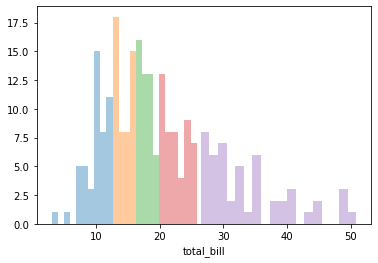

In [39]:
for i,j in zip(range(1,6),[10,4,4,6,18]):
    sns.distplot(tips[tips['total_bill eqfreq encode']== i]['total_bill'],bins=j, kde=False)

## Equal Interval
data dibagi ke dalam sejumlah interval dimana pada masing-masing interval memiliki panjang interval yang sama misalkan 0-5, 6-10, 11-15 dan seterusnya  
Kalau distribusinya sempit (kurtosis tinggi) dan simetris pakai equal interval binning

In [41]:
eqint=tips.pivot_table(index='total_bill eqint', aggfunc=len, values='tip')
eqint.columns=['freq']
eqint
#bisa dilihat tiap interval memiliki jarak yang mirip2 (kurang lebih 9), tapi dengan nilai freq berbeda2

,freq
total_bill eqint,
"(3.022, 12.618]",49.0
"(12.618, 22.166]",119.0
"(22.166, 31.714]",50.0
"(31.714, 41.262]",19.0
"(41.262, 50.81]",7.0


C:\Users\brigi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


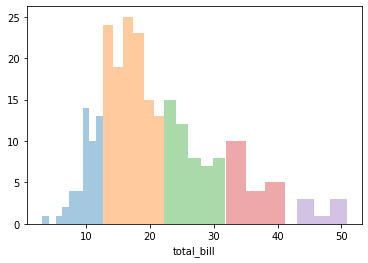

In [43]:
for i in range(1,6):
    sns.distplot(tips[tips['total_bill eqint encode']==i]['total_bill'],kde=False)

## binning with sklearn

In [44]:
from sklearn.preprocessing import KBinsDiscretizer #untuk binning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [45]:
disk=pd.read_csv('disk.csv')
disk.head()

,x,class
0,51,0
1,19,1
2,66,1
3,35,0
4,64,1


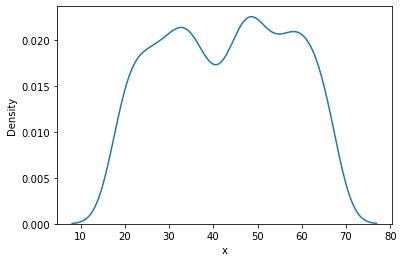

In [46]:
sns.kdeplot(data=disk['x'])

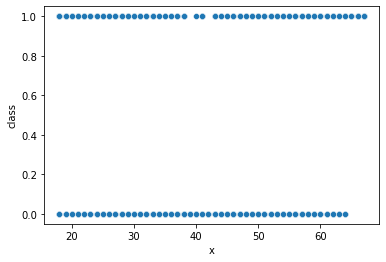

In [47]:
sns.scatterplot(x='x',y='class', data=disk)

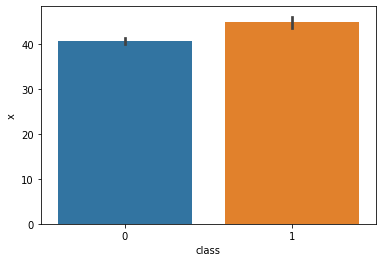

In [48]:
sns.barplot(x='class',y='x', data=disk)

Kalau dilihat sekilas, tidak ada pattern yang terbentuk antara x dengan class.  
Mari kita coba binning variabel x dan hitung proporsi tiap kelasnya

In [51]:
disk['x eqint']=pd.cut(disk['x'],7)
disk['x eqint encode']=pd.cut(disk['x'],7, labels=range(1,8))
disk

,x,class,x eqint,x eqint encode
0,51,0,"(46.0, 53.0]",5
1,19,1,"(17.951, 25.0]",1
2,66,1,"(60.0, 67.0]",7
3,35,0,"(32.0, 39.0]",3
4,64,1,"(60.0, 67.0]",7
...,...,...,...,...
1524,58,1,"(53.0, 60.0]",6
1525,64,1,"(60.0, 67.0]",7
1526,47,0,"(46.0, 53.0]",5
1527,26,1,"(25.0, 32.0]",2


In [53]:
ct=pd.crosstab(disk['x eqint'],disk['class'],normalize=0)
ct

class,0,1
x eqint,,
"(17.951, 25.0]",0.224670,0.775330
"(25.0, 32.0]",0.537037,0.462963
"(32.0, 39.0]",0.835616,0.164384
"(39.0, 46.0]",0.846561,0.153439
"(46.0, 53.0]",0.583673,0.416327
"(53.0, 60.0]",0.302632,0.697368
"(60.0, 67.0]",0.068293,0.931707


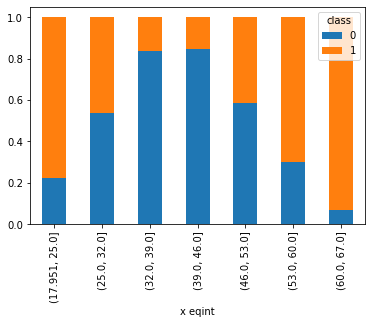

In [54]:
ct.plot(kind='bar',stacked=True)

Di ilustrasi di atas, kita bisa melihat proporsi class dari 7 kategori binning data x. Proporsi class 1 menurun sampai bin ke 4, lalu meningkat setelahnya. Kita bisa melihat ada hubungan non linear (kuadratik) antara x dan proporsi class. Penambahan fitur polinomial bisa meningkatkan performa prediksi, tapi di conton ini, kita akan coba dengan binning.

### Model without Binning

In [55]:
x=disk[['x']]
y=disk['class']

x_train,x_test, y_train, y_test= train_test_split(x,y, stratify=y, random_state=2020)

In [56]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [57]:
y_pred=logreg.predict(x_test)
print('akurasi:', accuracy_score(y_test,y_pred))

akurasi: 0.5822454308093995


### Model with Binning

In [58]:
discretize= KBinsDiscretizer(n_bins=7, encode='onehot', strategy='uniform') # uniform= eq intv, quantile= eq freq
# encode onehot karena hubungan antara x dan class tidak linear
x_train_disc= discretize.fit_transform(x_train)
x_test_disc= discretize.transform(x_test)

In [61]:
logreg=LogisticRegression()
logreg.fit(x_train_disc,y_train)

LogisticRegression()

In [62]:
y_pred=logreg.predict(x_test_disc)
print('akurasi:', accuracy_score(y_test,y_pred))

akurasi: 0.6997389033942559


dengan binning akurasi meningkat dari 58,22% menjadi 69,97%

In [64]:
x_test_disc

<383x7 sparse matrix of type '<class 'numpy.float64'>'
	with 383 stored elements in Compressed Sparse Row format>

# Polynomial
Digunakan pada linear model.

In [66]:
from sklearn.preprocessing import PolynomialFeatures

In [68]:
wine= pd.read_csv('white_wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [69]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      1
sulphates               1
alcohol                 1
quality                 1
dtype: int64

x= density, alcohol  
y= quality>6, 1(good), 0(bad)

In [71]:
wine['alcohol']=wine['alcohol'].fillna(wine['alcohol'].mean())
wine['label']=np.where(wine['quality']>6,1,0)

In [72]:
wine['label'].value_counts()

0    422
1     98
Name: label, dtype: int64

In [73]:
x=wine[['density','alcohol']]
y=wine['label']

In [74]:
#splitting data
x_train,x_test,y_train,y_test=train_test_split(x,y, stratify=y, random_state=2020)

## Without polynomial

In [75]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
print('akurasi',accuracy_score(y_test,y_pred))

akurasi 0.8538461538461538


## With Polynomial

In [76]:
poly= PolynomialFeatures(degree=3, interaction_only=False, include_bias=False) 
x_train_poly= poly.fit_transform(x_train)
x_test_poly= poly.transform(x_test)

In [81]:
poly.get_feature_names_out() #nama2 features baru

array(['density', 'alcohol', 'density^2', 'density alcohol', 'alcohol^2',
       'density^3', 'density^2 alcohol', 'density alcohol^2', 'alcohol^3'],
      dtype=object)

In [79]:
pd.DataFrame(x_train_poly,columns=poly.get_feature_names_out())

,density,alcohol,density^2,density alcohol,alcohol^2,density^3,density^2 alcohol,density alcohol^2,alcohol^3
0,0.9936,9.1,0.987241,9.04176,82.81,0.980923,8.983893,82.280016,753.571
1,0.9998,8.7,0.999600,8.69826,75.69,0.999400,8.696520,75.674862,658.503
2,0.9934,9.7,0.986844,9.63598,94.09,0.980330,9.572383,93.469006,912.673
3,0.9910,12.6,0.982081,12.48660,158.76,0.973242,12.374221,157.331160,2000.376
4,0.9931,10.6,0.986248,10.52686,112.36,0.979443,10.454225,111.584716,1191.016
...,...,...,...,...,...,...,...,...,...
385,0.9927,9.4,0.985453,9.33138,88.36,0.978259,9.263261,87.714972,830.584
386,0.9955,10.4,0.991020,10.35320,108.16,0.986561,10.306611,107.673280,1124.864
387,0.9949,9.0,0.989826,8.95410,81.00,0.984778,8.908434,80.586900,729.000
388,0.9974,10.5,0.994807,10.47270,110.25,0.992220,10.445471,109.963350,1157.625


In [83]:
logreg=LogisticRegression(max_iter=1000)
logreg.fit(x_train_poly,y_train)
y_pred=logreg.predict(x_test_poly)
print('akurasi:', accuracy_score(y_test,y_pred))

akurasi: 0.9692307692307692


dengan polynomial degree=3, nilai akurasi meningkat dari 85.38% menjadi 96.92%